In [4]:
# importing all necessary modules
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,accuracy_score, classification_report, f1_score ,confusion_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings

In [7]:
df = pd.read_csv("train_news.csv")

In [8]:
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [9]:
df.shape  # Total 20800 records

(20800, 6)

In [10]:
df.written_by.nunique()   # 4201 unique writers

4201

In [11]:
df.nunique()  # Unique counts of every columns

Unnamed: 0    20800
id            20800
headline      19803
written_by     4201
news          20386
label             2
dtype: int64

In [12]:
df.isna().sum()   # na values exist in the Dataset

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [13]:
# Total na values in Headlines
df[df.headline.isna() == True]

,Unnamed: 0,id,headline,written_by,news,label
8,8,13559,NaN,steventexas,People have made up their minds on president.\...,1
14,14,14017,NaN,hubwolf,True. Hillary needs a distraction and what bet...,1
24,24,8643,NaN,OZbanislam,When I attempt to share your stuff on Facebook...,1
56,56,1835,NaN,Anteater,The Philippines are doing just fine since kick...,1
72,72,7209,NaN,Paul Reinhardt,Let's see - #1 liar denies knowledge of #2 lia...,1
...,...,...,...,...,...,...
20671,20671,1498,NaN,Man,do you need an advanced warning that Lawrence ...,1
20703,20703,19714,NaN,ELSEVAR,"Alas, Tyler, Hillary was/is an unapologetic bo...",1
20738,20738,9292,NaN,Daniel Pejchl,So he didn't question where he was sending ema...,1
20748,20748,7124,NaN,Anonymous,The second video (bottom one ) proves what Tru...,1


In [14]:
# Replace null headline with "Headline"
df.loc[:,"headline"] = list(df.headline.fillna("Headline"))

In [15]:
# Data with na values in News
df[df.news.isna() == True]

,Unnamed: 0,id,headline,written_by,news,label
556,556,9454,Il saoule tout le monde avec son analyse polit...,NaN,NaN,1
1642,1642,11486,"Pour booster les ventes, Dassault offre un por...",NaN,NaN,1
1765,1765,573,Le top des recherches Google passe en top des ...,NaN,NaN,1
1968,1968,9446,Trop essoufflé après avoir cherché ses affaire...,NaN,NaN,1
2200,2200,3729,Les Américains ne sont plus qu’à quelques heur...,NaN,NaN,1
3183,3183,13107,Les gardes-frontières se mettent en alerte pou...,NaN,NaN,1
3927,3927,4358,Ne supportant plus l’ambiance de la campagne é...,NaN,NaN,1
4333,4333,14499,Primaire – François Fillon se désiste au profi...,NaN,NaN,1
4746,4746,2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,NaN,1
4747,4747,8649,Donald Trump s’excuse pour toutes les minorité...,NaN,NaN,1


Here the Headlines are not even in English Language so they can be dropped

In [16]:
# Drop News with value na
df = df[df.news.isna() == False]

In [17]:
df.isna().sum()

Unnamed: 0       0
id               0
headline         0
written_by    1918
news             0
label            0
dtype: int64

In [18]:
df.shape    # Total 20761 records with 6 columns

(20761, 6)

In [19]:
# Dropping Unwanted Columns
df = df.drop(["Unnamed: 0","id"], axis=1)

In [20]:
df

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...
20795,Headline,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [21]:
df.label.value_counts()   # It's a Balanced Dataset

0    10387
1    10374
Name: label, dtype: int64

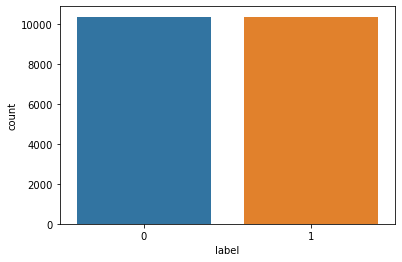

In [22]:
sns.countplot(df["label"])

In [23]:
df.written_by.nunique()   # 4201 unique writers in the Entire Dataset

4201

In [24]:
#Function to plot Pie Chart
def dict_2_pie_chart(data):
    labels = []
    sizes = []

    for x, y in data.items():
        labels.append(x)
        sizes.append(y)
    plt.figure(figsize=(20, 20))
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  
    plt.show()

In [50]:
# Filtering only the Fake News with Label 1
df2 = df[df.label == 1]

In [52]:
df2

,headline,written_by,news,label
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1
7,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
8,Headline,steventexas,People have made up their minds on president.\...,1
9,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1
...,...,...,...,...
20791,"Putin: No difference between Clinton, Trump",Editor,Russian President Vladimir Putin has responded...,1
20792,"REUTERS TO CUT 2,000 JOBS…",newsguy76,Warning : array_key_exists() expects parameter...,1
20795,Headline,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1


In [53]:
# Grouping the Fake News Data by Written By and adding labels to find total count of fake news per writer
new_df = df2.groupby(['written_by']).sum().reset_index()  

In [80]:
# Creating a dataframe with only written by and count of Fake news
fakenews_writer = new_df[["written_by","label"]].sort_values(by=['label'], ascending= [False])

In [81]:
# The List of all Writers who write Fake News
list(fakenews_writer.written_by)

['admin',
 'Pakalert',
 'Eddy Lavine',
 'Starkman',
 'Gillian',
 'Alex Ansary',
 'Editor',
 'noreply@blogger.com (Alexander Light)',
 'Anonymous',
 'Dave Hodges',
 'IWB',
 'The European Union Times',
 'BareNakedIslam',
 'Activist Post',
 'The Doc',
 'EdJenner',
 'Henry Wolff',
 'Mac Slavo',
 'Iron Sheik',
 'Kaitlyn Stegall',
 'Jason Ditz',
 'noreply@blogger.com (Der Postillon)',
 'Heather Callaghan',
 'David Stockman',
 'Geoffrey Grider',
 'King World News',
 'shorty',
 'Consortiumnews.com',
 'The Saker',
 '-NO AUTHOR-',
 'Dikran Arakelian (noreply@blogger.com)',
 'wmw_admin',
 'Amy Moreno',
 'Daniel Greenfield',
 'Andrew Anglin',
 'stevew',
 'Jafe Arnoldski (noreply@blogger.com)',
 'Howard Portnoy',
 'pcr3',
 'Arnold Monteverde (noreply@blogger.com)',
 'Admin',
 'beforeitsnews.com',
 'Mike Rivero',
 'The Conservative Millennial',
 'Julius Hubris',
 'Guest',
 'Madeline',
 'Jason Easley',
 'Poke Staff',
 'Author',
 'Grant Stern',
 'Truth Broadcast Network',
 'Contributing Author',
 'Yve

In [57]:
# Fake News writers with more than 50 fake news
fakenews_writer[fakenews_writer.label > 50]

,written_by,label
1710,admin,193
1213,Pakalert,86
526,Eddy Lavine,85
1474,Starkman,84
634,Gillian,82
59,Alex Ansary,82
527,Editor,81
1861,noreply@blogger.com (Alexander Light),80
129,Anonymous,77
437,Dave Hodges,77


<Figure size 1440x1440 with 0 Axes>

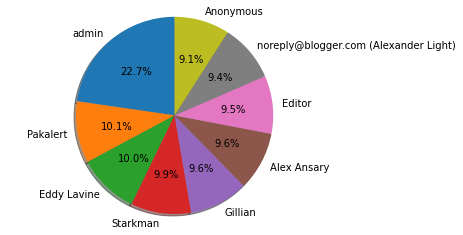

In [58]:
dict_2_pie_chart(dict(fakenews_writer.sort_values(by=['label'], ascending= [False])[:9].values))

The writers with Highest number of Fake news are : admin, Pakalert, Eddy Lavine, Starkman etc to name a few.

In [59]:
# Defining Function for Word Clouds
def Word_Cloud(str_List):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in str_List:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "


    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

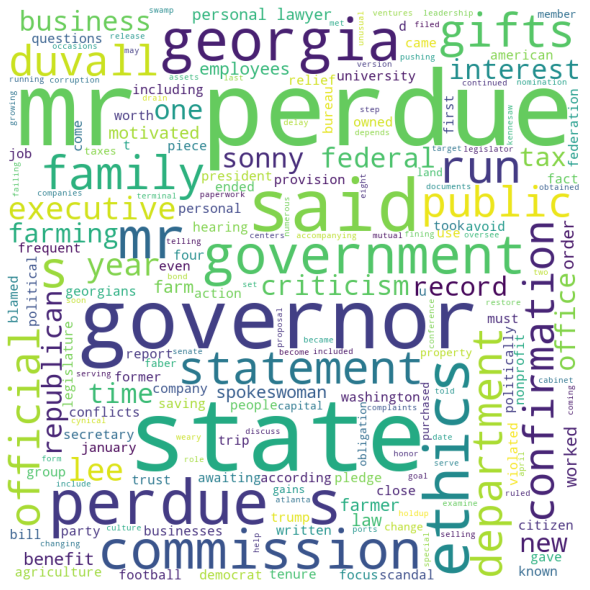

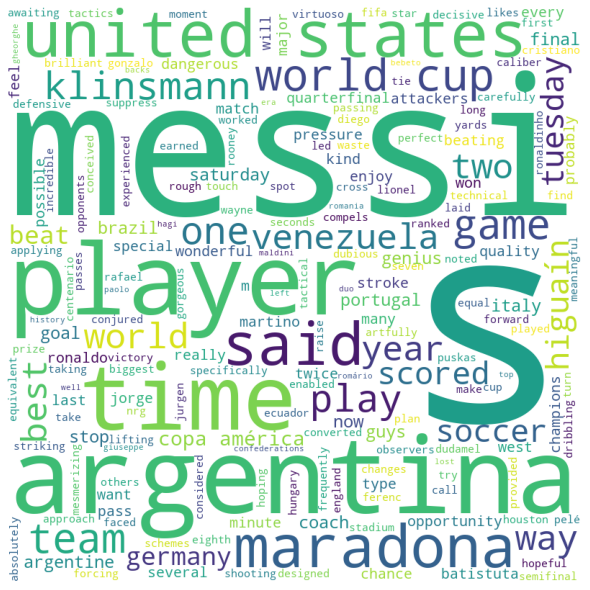

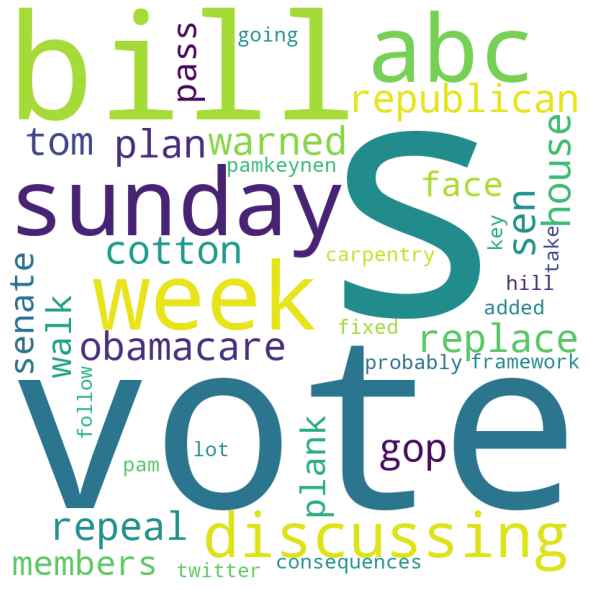

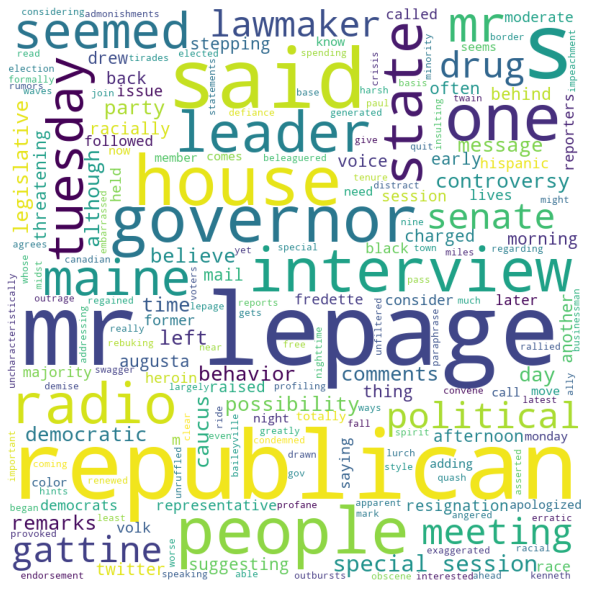

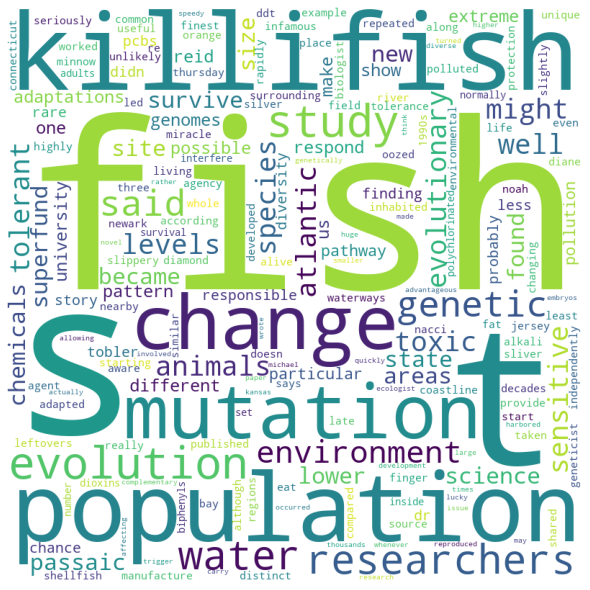

In [61]:
# Word Cloud of 5 Samples of Real News (Label = 0)
sample = list(df[df.label == 0].news[:5])
for i in sample:
    Word_Cloud(i.split(" "))

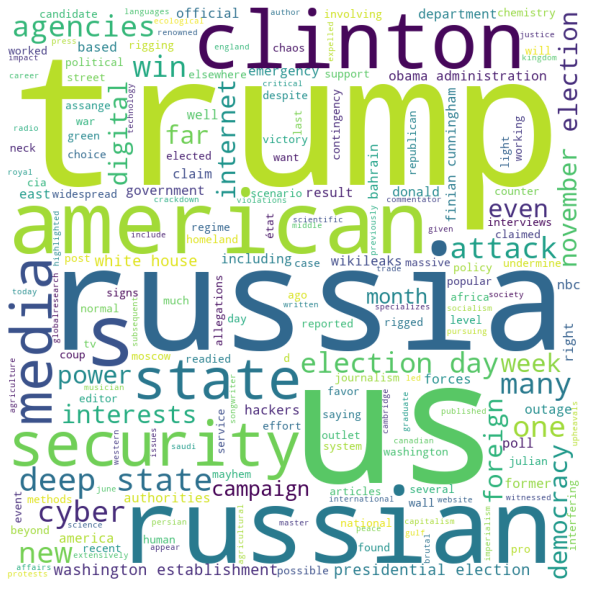

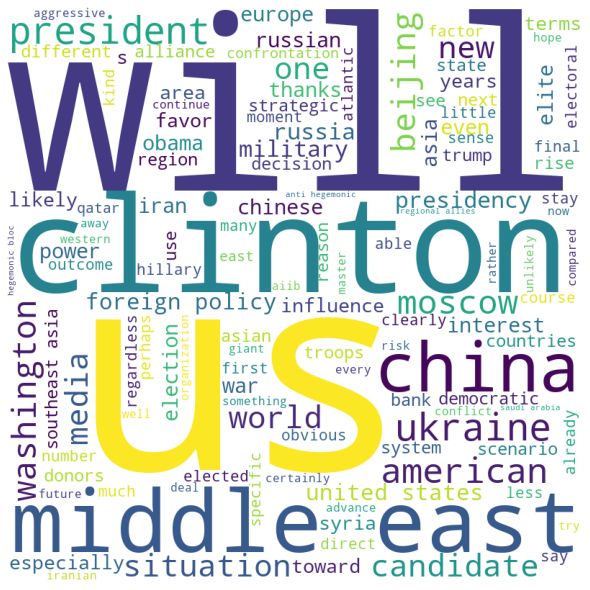

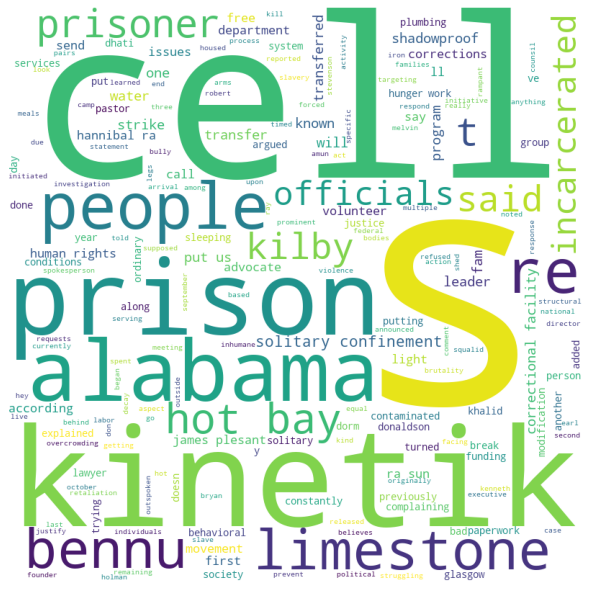

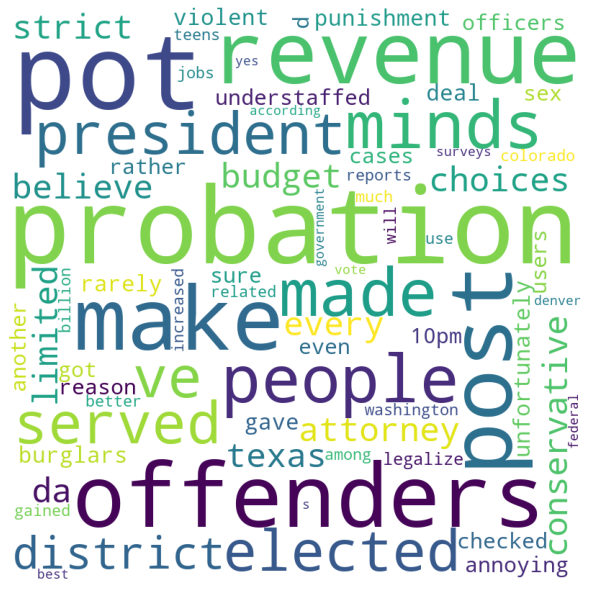

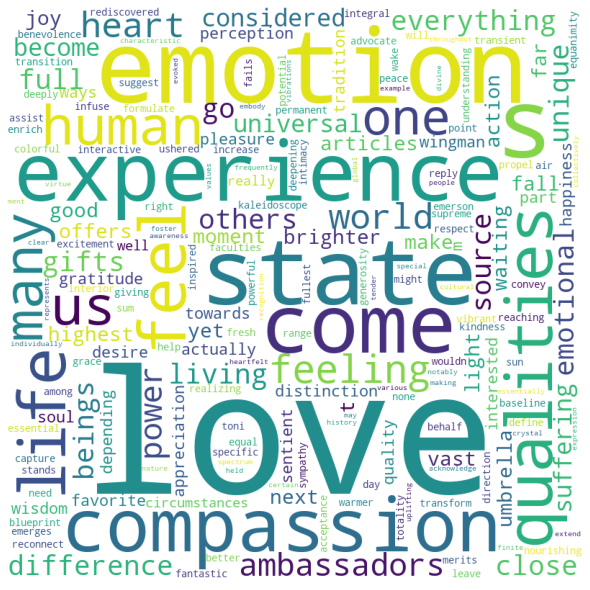

In [62]:
# Word Cloud of 5 Samples of Fake News (Label = 1)
sample = list(df[df.label == 1].news[:5])
for i in sample:
    Word_Cloud(i.split(" "))

Here we can see that the word clouds of both fake as well as real news are hard to distinguish

## Machine Learning Models 

In [64]:
# Combining both Headlines and News to be Inputs for the ML Models
inputs = []
for i,j in zip(list(df.headline),list(df.news)):
    inputs.append(i + " " + j)
    
len(inputs)

20761

In [65]:
y = df.label

In [66]:
len(y)

20761

In [67]:
# Splitting into training and Test dataset
X_train,X_test,y_train,y_test=train_test_split(inputs,y,test_size=0.2,random_state=88)

Using TF-IDF to convert text data into numerical format for ML models 

In [68]:
vectorizer = TfidfVectorizer(min_df =1,stop_words='english',use_idf=True,analyzer='word',
                             ngram_range=(1,1),max_features=15000)
x_train = vectorizer.fit_transform(X_train)
x_test  = vectorizer.transform(X_test)

### Logistic Regression 

In [69]:
logisticRegr = LogisticRegression(solver='liblinear',class_weight='balanced',random_state=5,tol=0.001,max_iter=1000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=5,
                   solver='liblinear', tol=0.001)

In [70]:
prediction1 = logisticRegr.predict(x_test)

In [71]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_test, prediction1))
print('\n','ACCURACY','\n',accuracy_score(y_test, prediction1))
print('\n','REPORT','\n',classification_report(y_test,prediction1))


 CONFUSION MATRIX 
 [[1981   84]
 [  64 2024]]

 ACCURACY 
 0.9643631110040934

 REPORT 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      2065
           1       0.96      0.97      0.96      2088

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153



### Random Forest 

In [72]:
rand = RandomForestClassifier()
rand.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
prediction2 = rand.predict(x_test)

In [74]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_test, prediction2))
print('\n','ACCURACY','\n',accuracy_score(y_test, prediction2))
print('\n','REPORT','\n',classification_report(y_test,prediction2))


 CONFUSION MATRIX 
 [[2003   62]
 [  80 2008]]

 ACCURACY 
 0.9658078497471707

 REPORT 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2065
           1       0.97      0.96      0.97      2088

    accuracy                           0.97      4153
   macro avg       0.97      0.97      0.97      4153
weighted avg       0.97      0.97      0.97      4153



Fairly good model which can be deployed

### Ada Boost 

In [75]:
ada = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.01)
ada.fit(x_train,y_train)  

AdaBoostClassifier(learning_rate=0.01)

In [76]:
predictions3 = ada.predict(x_test)

In [77]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_test, predictions3))
print('\n','ACCURACY','\n',accuracy_score(y_test, predictions3))
print('\n','REPORT','\n',classification_report(y_test,predictions3))


 CONFUSION MATRIX 
 [[1570  495]
 [ 246 1842]]

 ACCURACY 
 0.8215747652299542

 REPORT 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      2065
           1       0.79      0.88      0.83      2088

    accuracy                           0.82      4153
   macro avg       0.83      0.82      0.82      4153
weighted avg       0.83      0.82      0.82      4153



### KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier( algorithm='brute')
KN.fit(x_train,y_train)
predictions4 = KN.predict(x_test)

In [79]:
print('\n','CONFUSION MATRIX','\n',confusion_matrix(y_test, predictions4))
print('\n','ACCURACY','\n',accuracy_score(y_test, predictions4))
print('\n','REPORT','\n',classification_report(y_test,predictions4))


 CONFUSION MATRIX 
 [[1901  164]
 [ 370 1718]]

 ACCURACY 
 0.8714182518661209

 REPORT 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      2065
           1       0.91      0.82      0.87      2088

    accuracy                           0.87      4153
   macro avg       0.87      0.87      0.87      4153
weighted avg       0.88      0.87      0.87      4153



The Best model so far for this Dataset is Random Forest Model with good accuracy, recall, precision as well as F1 Score